In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Tworzenie grafu

In [2]:
routes_df = pd.read_csv("routes_df.csv")
G = nx.from_pandas_edgelist(routes_df, edge_attr='time', create_using=nx.MultiDiGraph())
G2 = nx.from_pandas_edgelist(routes_df, edge_attr='time', create_using=nx.DiGraph())
G3 = nx.from_pandas_edgelist(routes_df, edge_attr='time', create_using=nx.Graph())
# pos_fruchterman_reingold = nx.fruchterman_reingold_layout(G3)
# pos_kamada_kawai = nx.kamada_kawai_layout(G3)

In [162]:
locations = pd.read_csv('stops.txt', sep=",", header=0)
locations['name_code_merge'] = locations.stop_name + '-' + locations.stop_code.astype(str)
locations.drop(['stop_name', 'stop_code', 'stop_id'], axis=1, inplace=True)
set(routes_df.source.unique().tolist()) - set(locations.name_code_merge.unique().tolist())

set()

In [164]:
locations.drop_duplicates(inplace=True)
# locations.to_csv('locations_geo.csv', index=False)
locations

,stop_lat,stop_lon,name_code_merge
0,51.133826,16.956735,Metalowców-12525
1,51.094301,17.032229,Dyrekcyjna-21101
2,51.112567,16.994232,Wrocławski Park Przemysłowy-12102
3,51.112189,17.063358,PL. GRUNWALDZKI-20923
4,51.152213,17.070059,Bagatela-23724
...,...,...,...
3819,51.118526,17.122765,Gospodarska-24729
3999,51.139859,16.921209,Grabowa-38104
4495,51.107320,17.073234,Hala Stulecia-42533
4496,51.149561,17.111132,Piwnika - Ponurego-29513


In [19]:
# Google Colab osmnx magic

In [19]:
locations = pd.read_csv('locations_xy.csv', sep=",", header=0)
locations

,name_code_merge,x,y
0,Metalowców-12525,1.887615e+06,6.611710e+06
1,Dyrekcyjna-21101,1.896019e+06,6.604720e+06
2,Wrocławski Park Przemysłowy-12102,1.891789e+06,6.607950e+06
3,PL. GRUNWALDZKI-20923,1.899484e+06,6.607883e+06
4,Bagatela-23724,1.900230e+06,6.614964e+06
...,...,...,...
2281,Gospodarska-24729,1.906097e+06,6.609004e+06
2282,Grabowa-38104,1.883660e+06,6.612778e+06
2283,Hala Stulecia-42533,1.900584e+06,6.607022e+06
2284,Piwnika - Ponurego-29513,1.904802e+06,6.614495e+06


In [165]:
node_positions = {}
for row in locations.iterrows():
    node_name = row[1].name_code_merge
    node_positions[node_name] = [row[1].stop_lat, row[1].stop_lon]
len(node_positions)

2283

In [169]:
G3 = nx.Graph()
for row in routes_df.iterrows():
    edge_info = row[1]
    if edge_info.source not in G3.nodes:
        G3.add_node(edge_info.source, attr={'pos': node_positions[edge_info.source]})
    if edge_info.target not in G3.nodes:
        G3.add_node(edge_info.target, attr={'pos': node_positions[edge_info.target]})
    G3.add_edge(edge_info.source, edge_info.target)
G3.add_edge('GALERIA DOMINIKAŃSKA-10123', 'Wzgórze Partyzantów-10222')
G3.number_of_nodes(), G3.number_of_edges(), list(G3.edges.data())[:5], list(G3.nodes.data())[:5]


(2062,
 2641,
 [('KRZYKI-11310', 'Sowia-16513', {}),
  ('KRZYKI-11310', 'Sowia-16514', {}),
  ('Sowia-16513', 'Chłodna-16515', {}),
  ('Sowia-16513', 'KRZYKI-11307', {}),
  ('Sowia-16513', 'Zimowa-16502', {})],
 [('KRZYKI-11310', {'attr': {'pos': [51.07488366, 17.00656861]}}),
  ('Sowia-16513', {'attr': {'pos': [51.07379262, 17.00184494]}}),
  ('Chłodna-16515', {'attr': {'pos': [51.07512234, 16.99667086]}}),
  ('Wawrzyniaka-16517', {'attr': {'pos': [51.078074, 16.9982022]}}),
  ('Rymarska-11547', {'attr': {'pos': [51.0793232, 16.99125798]}})])

In [4]:
n_G_edges, n_G2_edges = len(G.edges), len(G2.edges)
print(f"Przed usunięciem pętli i wielokrotnych krawędzi: {n_G_edges}")
print(f"Po usunięciu pętli i wielokrotnych krawędzi: {n_G2_edges}")
print(f"Ubyło {n_G_edges - n_G2_edges} krawędzi (pozostało {n_G2_edges/n_G_edges*100:.2f}% krawędzi)")

Przed usunięciem pętli i wielokrotnych krawędzi: 6204
Po usunięciu pętli i wielokrotnych krawędzi: 2643
Ubyło 3561 krawędzi (pozostało 42.60% krawędzi)


In [5]:
n_G3_edges = len(G3.edges)
print(f"Przed usunięciem kierunków i redukcji wielokrotnych ścieżek: {n_G2_edges}")
print(f"Po usunięciu pętli i wielokrotnych krawędzi: {n_G3_edges}")
print(f"Ubyło {n_G2_edges - n_G3_edges} krawędzi (pozostało {n_G3_edges/n_G2_edges*100:.2f}% krawędzi)")

Przed usunięciem kierunków i redukcji wielokrotnych ścieżek: 2643
Po usunięciu pętli i wielokrotnych krawędzi: 2640
Ubyło 3 krawędzi (pozostało 99.89% krawędzi)


# Analiza sieci

* liczba wierzchołków/krawędzi
* rozkład stopni węzła
* rozkład najkrótszych ścieżek
* rozkład współczynnika grupowania
* średnica sieci
* liczba komponentów
* kluczowe węzły w sieci z punktu widzenia różnych miar
* do jakiego modelu sieci jest zbliżona nasza sieć (losowa, bezskalowa itd.)

## Liczba wierzchołków/krawędzi

In [26]:
G3.number_of_nodes(), G3.number_of_edges()

(2062, 2640)

## Rozkład stopni węzła

<AxesSubplot:ylabel='Count'>

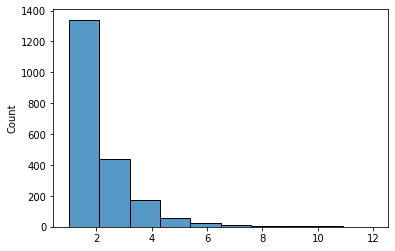

In [15]:
degrees = np.array([G3.degree(node) for node in G2.nodes])
sns.histplot(degrees, bins=10)

## Rozkład najkrótszych ścieżek

<AxesSubplot:ylabel='Count'>

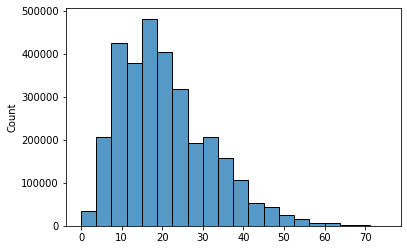

In [30]:
path_lengths = [list(x[1].values()) for x in list(nx.shortest_path_length(G3))]
path_lengths = [x for xs in path_lengths for x in xs]
sns.histplot(path_lengths, bins=20)

## Rozkład współczynnika grupowania sieci

<AxesSubplot:ylabel='Count'>

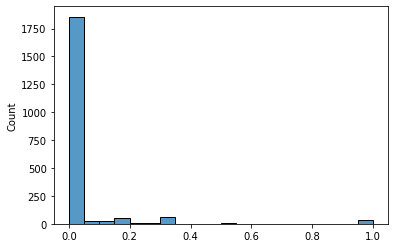

In [32]:
sns.histplot(list(nx.clustering(G3).values()), bins=20)

## Liczba komponentów

In [35]:
print('komponenty silnie połączone:', len(list(nx.strongly_connected_components(G2))))
print('komponenty słabo połączone:', len(list(nx.weakly_connected_components(G2))))

komponenty silnie połączone: 313
komponenty słabo połączone: 2


## Kluczowe węzły w sieci z punktu widzenia różnych miar

### Bliskość

In [36]:
d = nx.closeness_centrality(G2)
sorted_closeness_centrality =  sorted(d, key=d.get, reverse=True)[:10]
pd.Series({k: round(d[k], 4) for k in sorted_closeness_centrality})

GALERIA DOMINIKAŃSKA-10111    0.0459
GALERIA DOMINIKAŃSKA-10126    0.0458
skwer Krasińskiego-20337      0.0457
PL. JANA PAWŁA II-10501       0.0453
DWORZEC AUTOBUSOWY-11321      0.0451
Katedra-20909                 0.0446
Dyrekcyjna-21101              0.0442
Ogród Botaniczny-20903        0.0442
PL. GRUNWALDZKI-20916         0.0440
Katedra-20931                 0.0438
dtype: float64

### Stopień

In [37]:
d = dict(nx.degree(G2))
sorted_degree =  sorted(d, key=d.get, reverse=True)[:10]
pd.Series({k: round(d[k], 4) for k in sorted_degree})

DWORZEC AUTOBUSOWY-21121                     12
GALERIA DOMINIKAŃSKA-10126                   10
PL. JANA PAWŁA II-10501                      10
Arkady (Capitol)-10366                        9
Hallera-11304                                 9
GALERIA DOMINIKAŃSKA-10111                    9
Psie Pole (Rondo Lotników Polskich)-29128     9
Hallera-11303                                 9
DWORZEC AUTOBUSOWY-21102                      9
KROMERA-24112                                 8
dtype: int64

### Betweenness centrality

In [38]:
d = nx.betweenness_centrality(G2)
sorted_betweenness =  sorted(d, key=d.get, reverse=True)[:10]
pd.Series({k: round(d[k], 4) for k in sorted_betweenness})

Kwiska-12318                                  0.1005
Wejherowska-12315                             0.1004
GALERIA DOMINIKAŃSKA-10126                    0.0867
FAT-11707                                     0.0716
Wrocławski Park Technologiczny-12150          0.0716
Psie Pole-29103                               0.0691
Psie Pole (Rondo Lotników Polskich)-29128     0.0647
GALERIA DOMINIKAŃSKA-10111                    0.0632
Biskupice Podgórne LG Electronics-70344001    0.0626
Arkady (Capitol)-10365                        0.0625
dtype: float64

## Do jakiego modelu sieci jest zbliżona nasza sieć (losowa, bezskalowa itd.)

### Metryki dla naszej sieci

In [40]:
from graph_tiger.measures import run_measure

# 2062, 2640 in our data
print(f'Number of edges: {G3.number_of_edges()}')

avg_vertex_betweenness = run_measure(G3, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)

Number of edges: 2640
Average vertex betweenness: 16093.68


### Porównanie z Erdos-Renyi

In [47]:
from graph_tiger.graphs import erdos_reyni

temp_graph = erdos_reyni(n=2062, p=0.0012, seed=None)
print(f'Number of edges: {temp_graph.number_of_edges()}')

avg_vertex_betweenness = run_measure(temp_graph, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)

Number of edges: 2621
Average vertex betweenness: 7317.11


### Porównanie z Barabasi-Albert

In [50]:
from graph_tiger.graphs import barabasi_albert

temp_graph = barabasi_albert(n=2062, m=2, seed=None)
print(f'Number of edges: {temp_graph.number_of_edges()}')

avg_vertex_betweenness = run_measure(temp_graph, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)

Number of edges: 4120
Average vertex betweenness: 5592.29


In [51]:
from graph_tiger.graphs import barabasi_albert

temp_graph = barabasi_albert(n=2062, m=1, seed=None)
print(f'Number of edges: {temp_graph.number_of_edges()}')

avg_vertex_betweenness = run_measure(temp_graph, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)

Number of edges: 2061
Average vertex betweenness: 8484.74


In [67]:
from graph_tiger.graphs import clustered_scale_free

temp_graph = clustered_scale_free(n=2062, m=1, p=0.05, seed=None)
print(f'Number of edges: {temp_graph.number_of_edges()}')

avg_vertex_betweenness = run_measure(temp_graph, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)

Number of edges: 2061
Average vertex betweenness: 9251.89


# Wizualizacje

# Bezpieczeństwo i odporność na awarie

## Metryki kluczowe dla bezpieczeństwa w sieci

### Avg. vertex betweenness

In [81]:
avg_vertex_betweenness = run_measure(G3, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)

Average vertex betweenness: 16093.68


In [84]:
from graph_tiger.measures import edge_connectivity

print(f'Minimalna liczba krawędzi, żeby rozdzielić główną składową: {edge_connectivity(G3)}')

Minimalna liczba krawędzi, żeby rozdzielić główną składową: 0


## Awarie i ataki

In [12]:
import os
import sys
import matplotlib.pyplot as plt

def plot_results(graph, steps, results, title):
   plt.figure(figsize=(6.4, 4.8))

   for method, result in results.items():
      result = [r / len(graph) for r in result]
      plt.plot(list(range(steps)), result, label=method)

   plt.ylim(0, 1)
   plt.ylabel('Współczynnik skupienia (LCC)')
   plt.xlabel('Liczba krawędzi naprawionych')
   plt.title(title)
   plt.legend()

   save_dir = os.getcwd() + '/plots/'
   os.makedirs(save_dir, exist_ok=True)

   #plt.savefig(save_dir + title + '.pdf')
   plt.show()
   plt.clf()

Running node attacks
Running simulation 1 times
Running simulation 1 times
Running simulation 1 times
Running simulation 1 times
Node attacks (60 epochs, 4 types) counting took: 447.204s


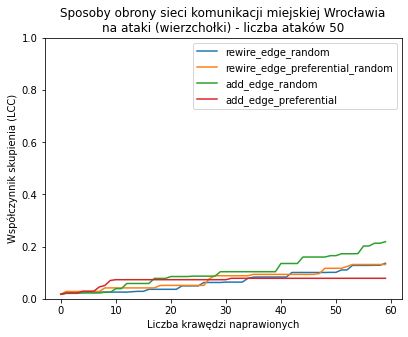

<Figure size 432x288 with 0 Axes>

In [18]:
from collections import defaultdict

from graph_tiger.attacks import Attack
from graph_tiger.defenses import Defense
from time import perf_counter
import pickle

steps = 60
params = {
    'runs': 1,
    'steps': steps,
    'k_a': 200,
    'attack': 'rb_node',
    'plot_transition': False,
    'gif_animation': False,
    'gif_snaps': False
}

print("Running node attacks")
node_start = perf_counter()
results = defaultdict(str)
edge_defenses = ['rewire_edge_random', 'rewire_edge_preferential_random', 'add_edge_random', 'add_edge_preferential']
for defense in edge_defenses:
    params['defense'] = defense
    params['attack_approx'] = int(0.05*len(G3))
    a = Defense(G3, **params)
    results[defense] = a.run_simulation()
node_stop = perf_counter()
print(f'Node attacks ({steps} epochs, {len(edge_defenses)} types) counting took: {node_stop - node_start:.3f}s')
# pickle.dump(results, open(f'results/{defense}_node_{steps}_steps.pkl', 'wb'))
plot_results(G3, params['steps'], results, title=f'Sposoby obrony sieci komunikacji miejskiej Wrocławia\nna ataki (wierzchołki) - liczba ataków 50')


# print("Running edge attacks")
# edge_start = perf_counter()
# results = defaultdict(str)

# for defense in edge_defenses:
#     params['defense'] = defense
#     params['attack_approx'] = int(0.05*len(G3))

#     a = Defense(G3, **params)
#     results[defense] = a.run_simulation()
# edge_stop = perf_counter()
# print(f'Edge attacks ({steps} epochs, {len(edge_defenses)} types) counting took: {edge_stop - edge_start:.3f}s')
# # pickle.dump(results, open(f'results/{defense}_edge_{steps}_steps.pkl', 'wb'))
# plot_results(G3, params['steps'], results, title=f'Sposoby obrony sieci komunikacji miejskiej Wrocławia\nna ataki (krawędzie) - liczba ataków 50')


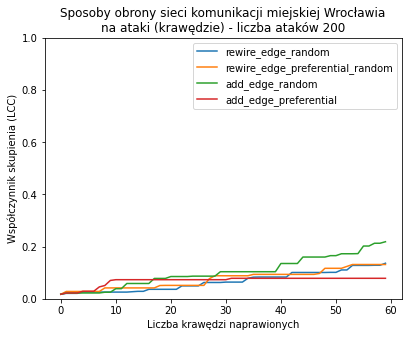

<Figure size 432x288 with 0 Axes>

In [19]:
plot_results(G3, params['steps'], results, title=f'Sposoby obrony sieci komunikacji miejskiej Wrocławia\nna ataki (krawędzie) - liczba ataków 200')


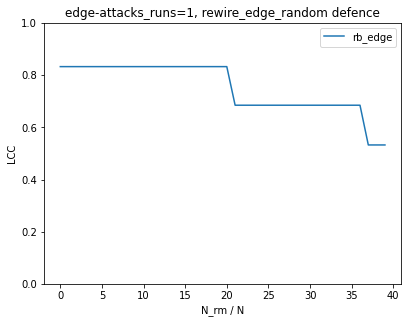

<Figure size 432x288 with 0 Axes>

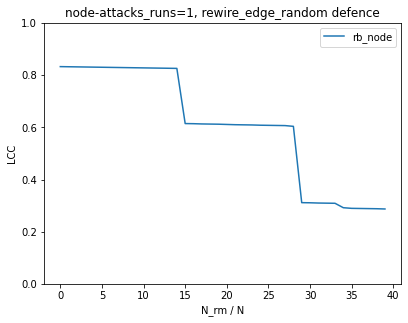

<Figure size 432x288 with 0 Axes>

In [ ]:
defence ='rewire_edge_random'
for type_attack in ['edge', 'node']:
    results = pickle.load(open(f'results/{defence}_{type_attack}_{steps}_steps.pkl', 'rb'))
    plot_results(G3, params['steps'], results, title=f'{type_attack}-attacks_runs={params["runs"]}, {defence} defence')

In [75]:
list(G3.nodes.data())[:5]

[('KRZYKI-11310', {'pos': [1893162.5578060704, 6601288.094083264]}),
 ('Sowia-16513', {'pos': [1892636.721266995, 6601095.304798637]}),
 ('Chłodna-16515', {'pos': [1892060.745316071, 6601330.269999001]}),
 ('Wawrzyniaka-16517', {'pos': [1892231.213305103, 6601851.860739628]}),
 ('Rymarska-11547', {'pos': [1891458.186270746, 6602072.618174248]})]

In [64]:
from graph_tiger.graphs import graph_loader

graph = graph_loader('ky2')
list(graph.edges.data())[:5]

[(0, 1, {}), (1, 465, {}), (1, 576, {}), (2, 3, {}), (3, 89, {})]

In [145]:
temp_G4 = nx.Graph()
temp_G4.add_node('a-a', attr={'pos': [1., 2.]})
temp_G4.add_node('b-b', attr={'pos': [2., 3.]})
temp_G4.add_node('c-c', attr={'pos': [3., 4.]})
temp_G4.add_node('d-d', attr={'pos': [5., 7.]})
temp_G4.add_node('e-e', attr={'pos': [3., 9.]})
temp_G4.add_node('e-e', attr={'pos': [3., 9.]})
temp_G4.add_node('f-f', attr={'pos': [5., 6.]})
temp_G4.add_edge('a-a', 'b-b', time=1)
temp_G4.add_edge('b-b', 'c-c', time=2)
temp_G4.add_edge('c-c', 'd-d', time=3)
temp_G4.add_edge('d-d', 'e-e', time=4)
temp_G4.add_edge('e-e', 'b-b', time=5)
temp_G4.add_edge('b-b', 'd-d', time=6)
temp_G4.nodes.data(), temp_G4.edges.data()

(NodeDataView({'a-a': {'attr': {'pos': [1.0, 2.0]}}, 'b-b': {'attr': {'pos': [2.0, 3.0]}}, 'c-c': {'attr': {'pos': [3.0, 4.0]}}, 'd-d': {'attr': {'pos': [5.0, 7.0]}}, 'e-e': {'attr': {'pos': [3.0, 9.0]}}, 'f-f': {'attr': {'pos': [5.0, 6.0]}}}),
 EdgeDataView([('a-a', 'b-b', {'time': 1}), ('b-b', 'c-c', {'time': 2}), ('b-b', 'e-e', {'time': 5}), ('b-b', 'd-d', {'time': 6}), ('c-c', 'd-d', {'time': 3}), ('d-d', 'e-e', {'time': 4})]))

In [170]:
len(list(nx.connected_components(G3)))

1

In [173]:
list(G3.nodes.data())[:5]

[('KRZYKI-11310', {'attr': {'pos': [51.07488366, 17.00656861]}}),
 ('Sowia-16513', {'attr': {'pos': [51.07379262, 17.00184494]}}),
 ('Chłodna-16515', {'attr': {'pos': [51.07512234, 16.99667086]}}),
 ('Wawrzyniaka-16517', {'attr': {'pos': [51.078074, 16.9982022]}}),
 ('Rymarska-11547', {'attr': {'pos': [51.0793232, 16.99125798]}})]

Creating example visualization
Running simulation 1 times


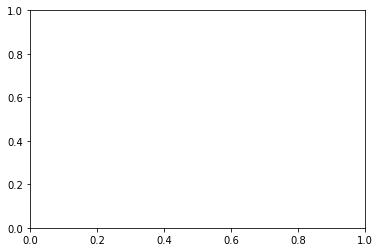

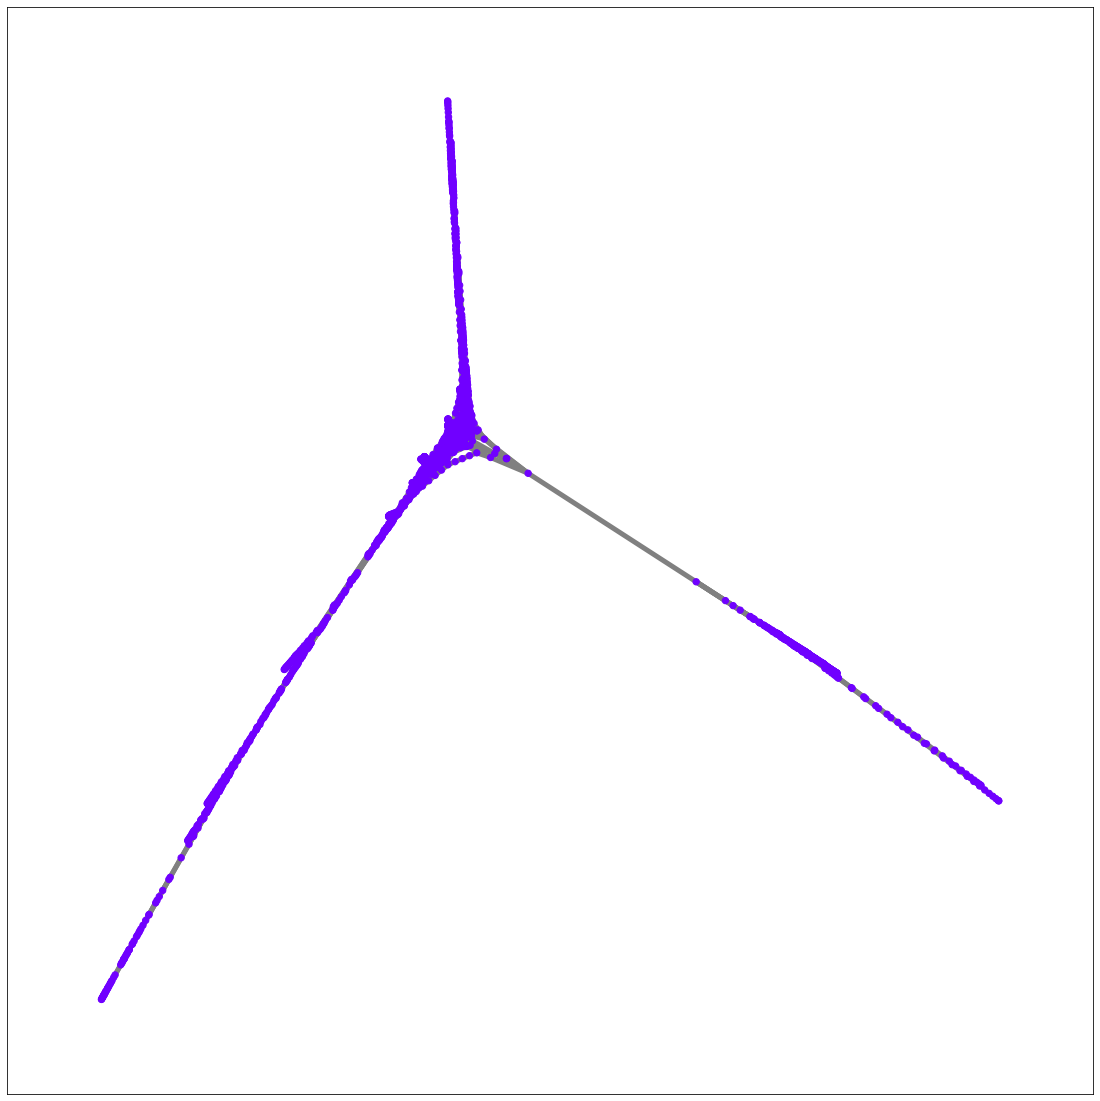

<Figure size 432x288 with 0 Axes>

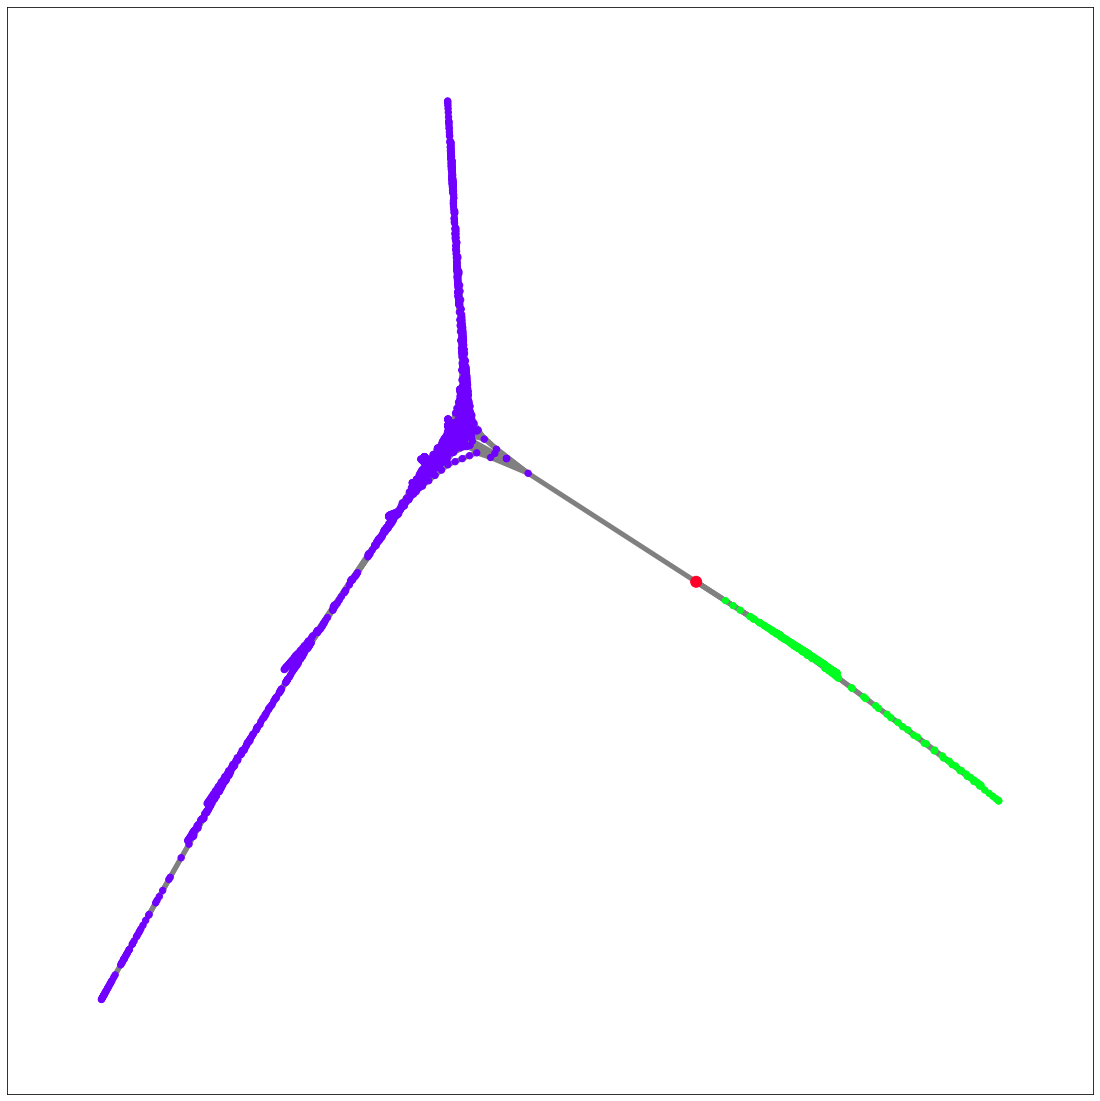

<Figure size 432x288 with 0 Axes>

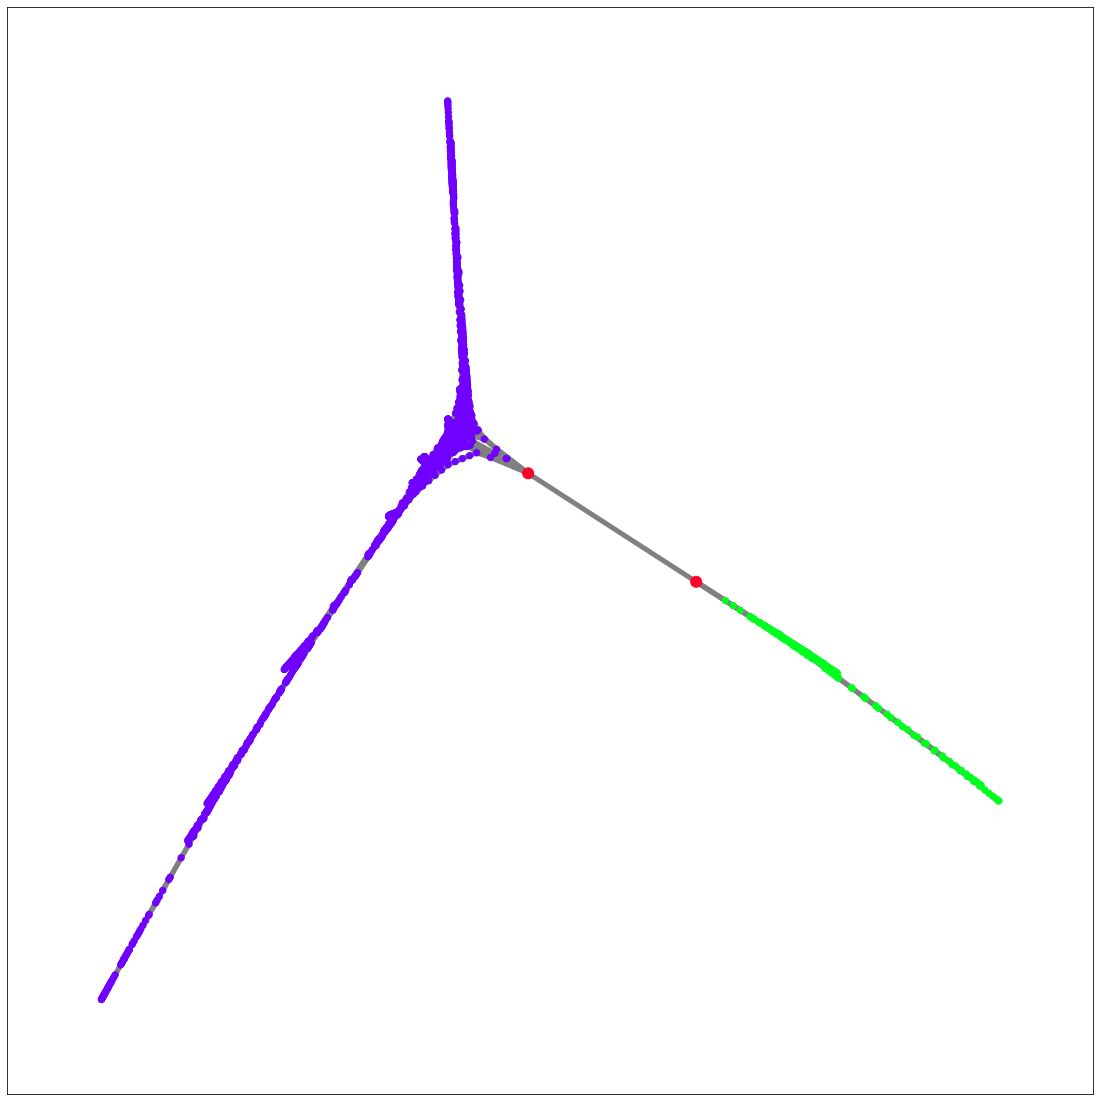

<Figure size 432x288 with 0 Axes>

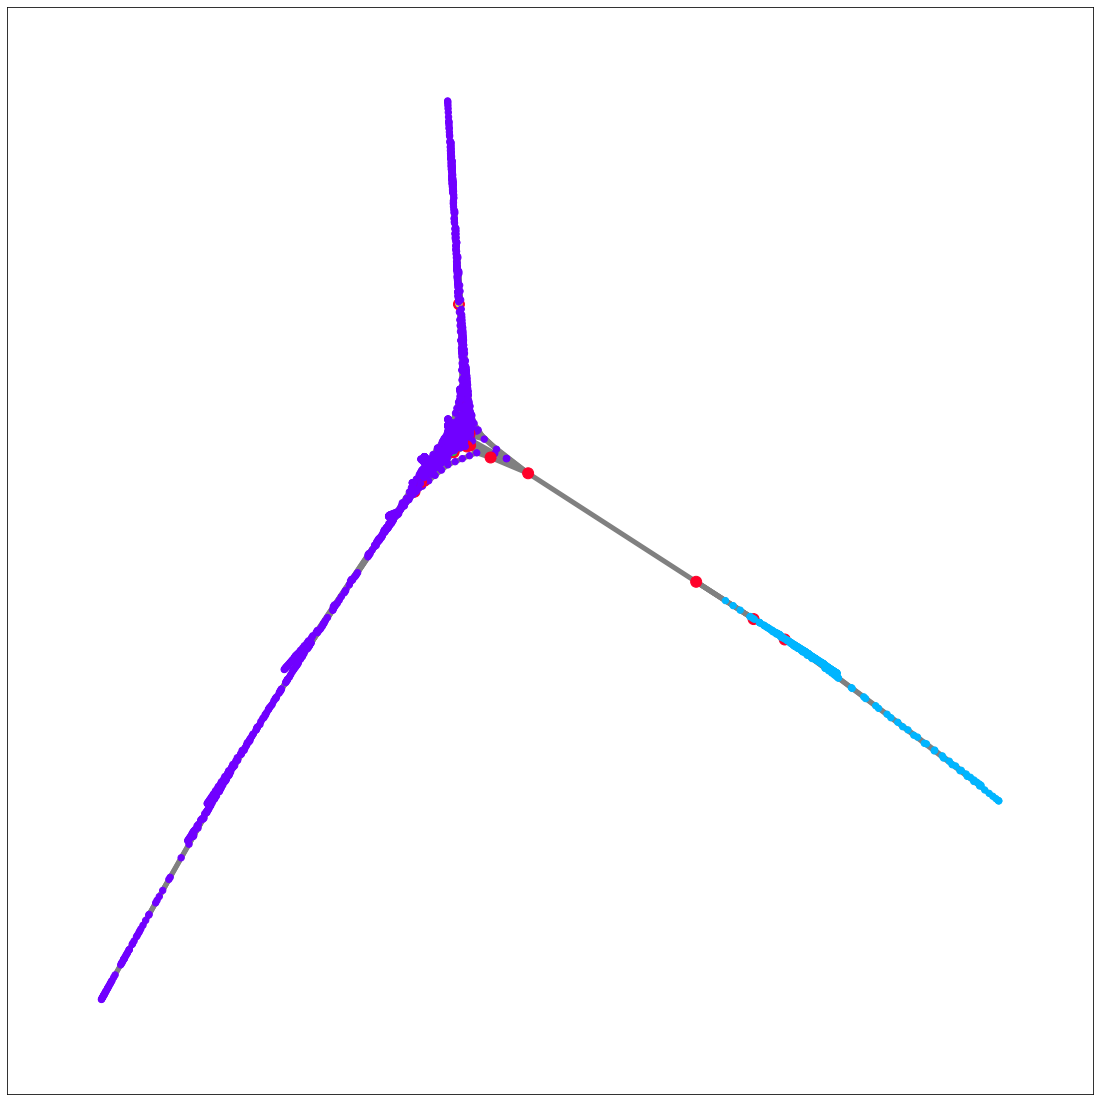

<Figure size 432x288 with 0 Axes>

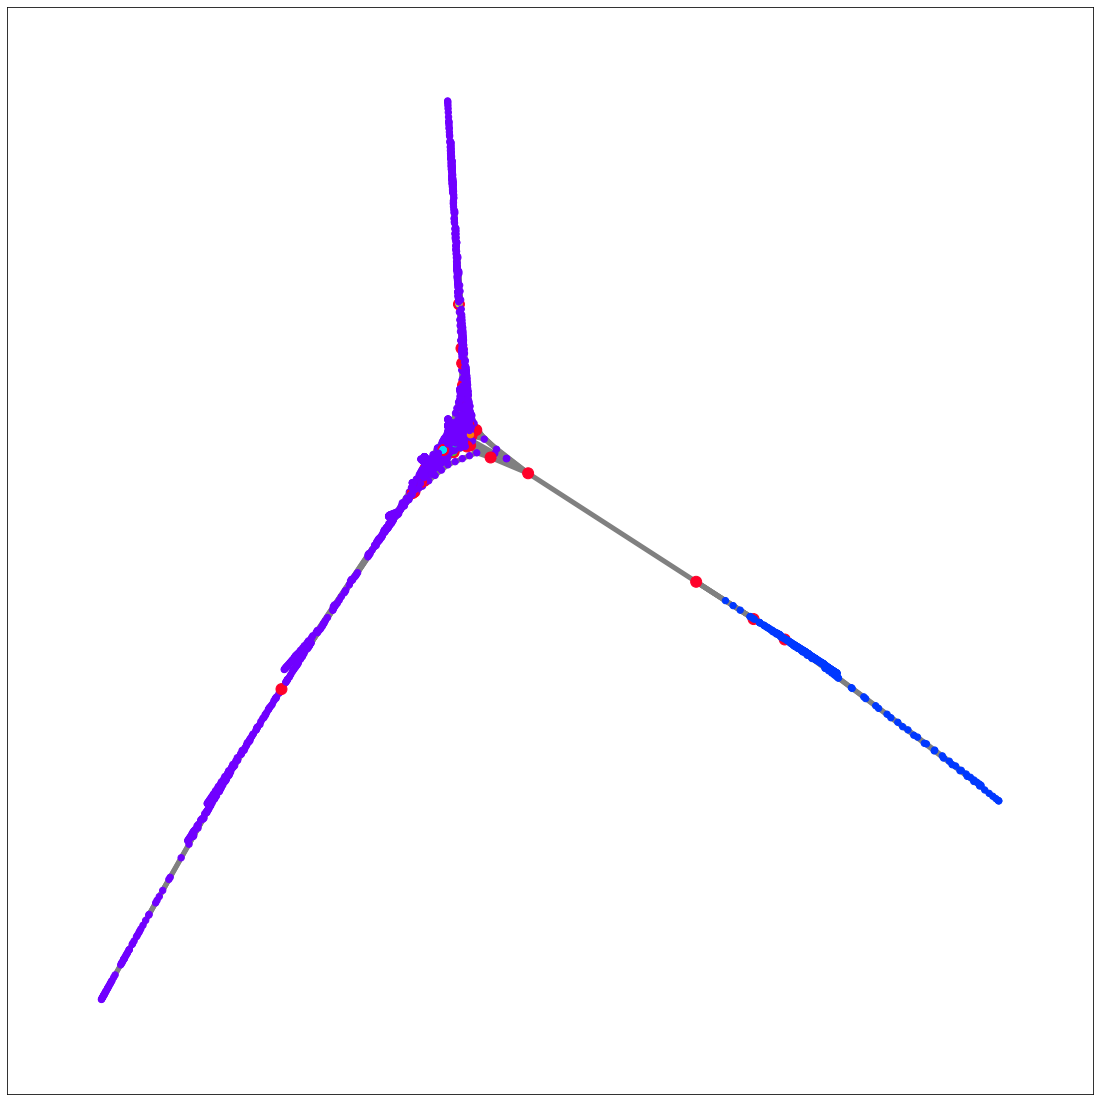

[2062.0,
 1717.0,
 1716.0,
 1715.0,
 1713.0,
 1712.0,
 1712.0,
 1711.0,
 1710.0,
 1709.0,
 1708.0,
 1707.0,
 1707.0,
 1706.0,
 1704.0,
 1703.0,
 1702.0,
 1697.0,
 1696.0,
 1695.0,
 1693.0,
 1692.0,
 1691.0,
 1690.0,
 1687.0,
 1686.0,
 1685.0,
 1684.0,
 1683.0,
 1682.0]

<Figure size 432x288 with 0 Axes>

In [175]:
import os
import sys
import matplotlib.pyplot as plt
from collections import defaultdict

from graph_tiger.attacks import Attack

params = {
    'runs': 1,
    'steps': 30,
    'seed': 1,

    'attack': 'ib_node',

    'plot_transition': True,
    'gif_animation': False,
    'gif_snaps': True,

    'edge_style': None,
    'node_style': None,
    'fa_iter': 2
}

print("Creating example visualization")
a = Attack(G3, **params)
a.run_simulation()


Graph-tiger nie chce współpracować z osmnxem. A ciężko zrzucić te wierzchołki do dobrego crsa tak, żeby odpowiadały po prostu xom i yom na wykresie bez wiedzy jak crsa zrzutować na mapę. Nie będziemy tego pisać, już i tak musieliśmy grzebać w kodzie tigera, żeby zrobił to, co do tej pory mamy.